# Generatives Trainig mit DeepHull loss, generatives und normales Netz trainieren gleichzeitig

In [1]:
import numpy as np
import torch

from script.Networks import ICNN
from script.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn_adversarial
from script.eval import Plots_for
from script.Verification import verification

In [2]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 10
batch_size = 10

number_of_adversarial_samples = 10000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


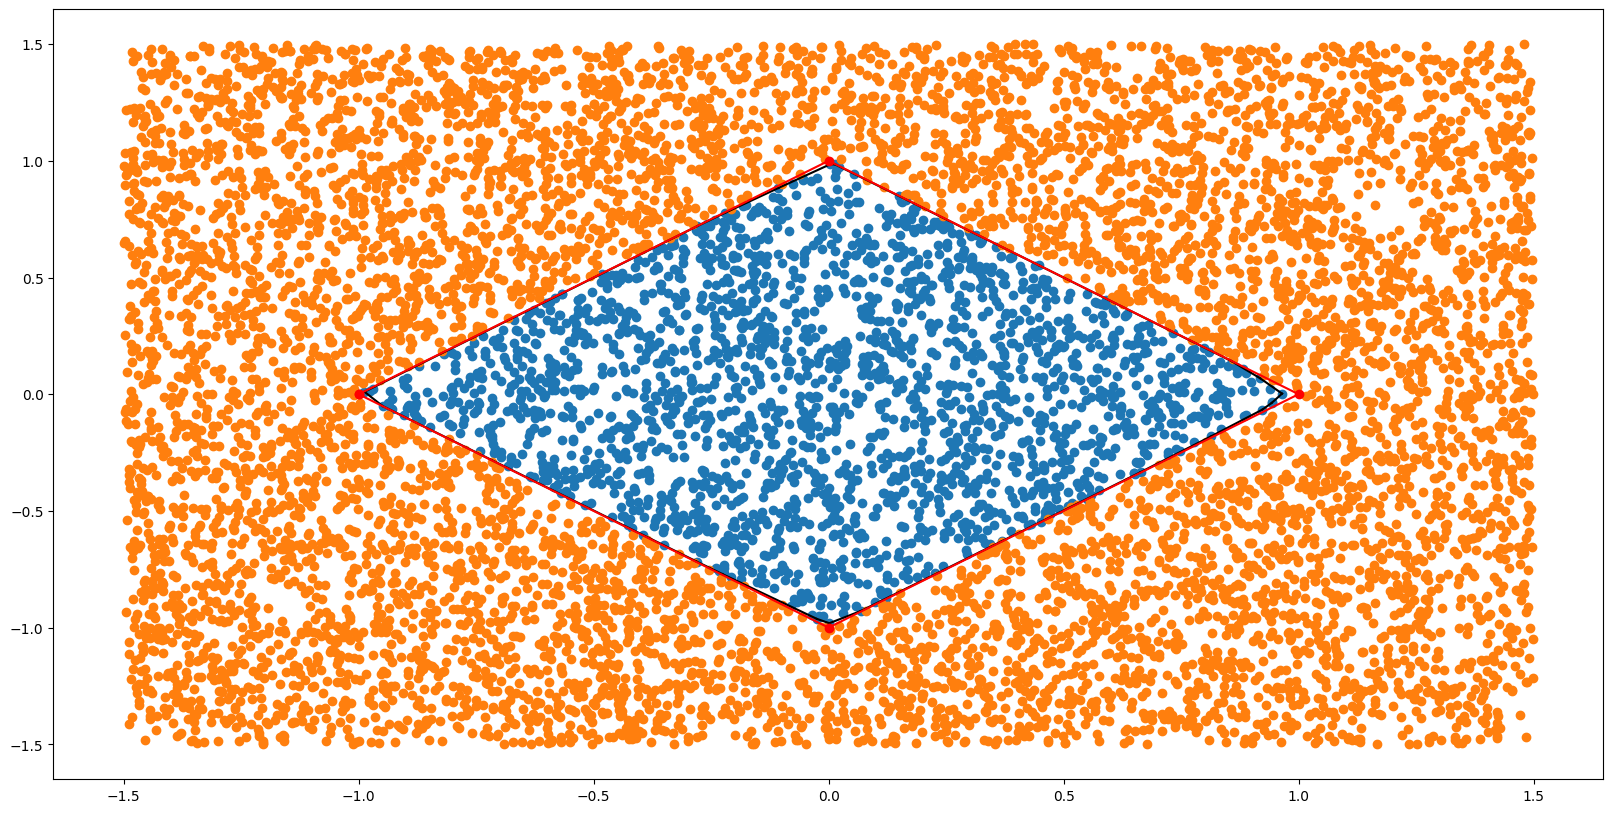

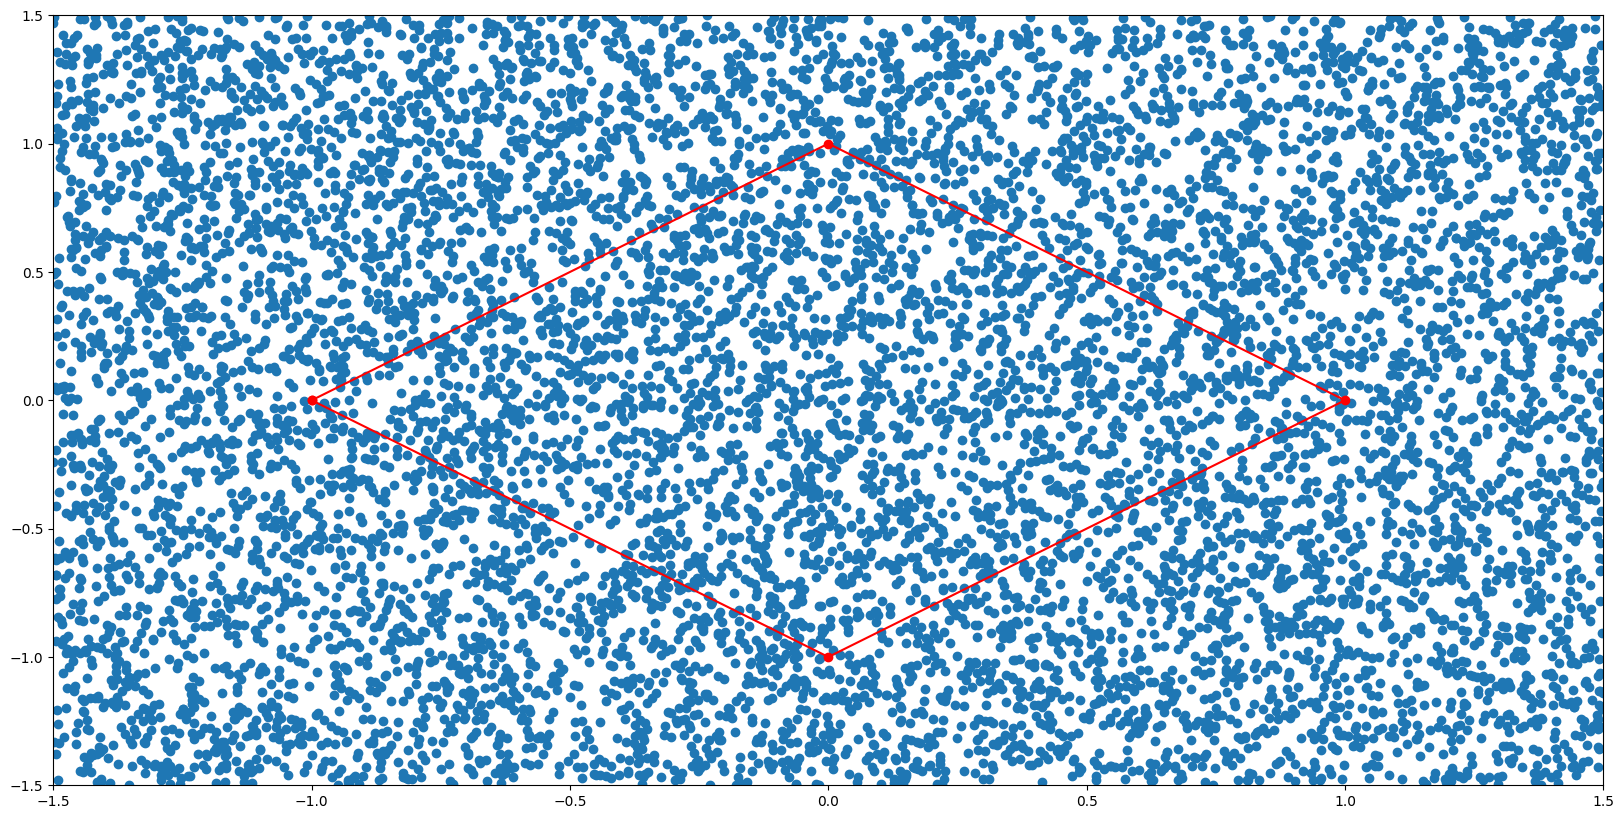

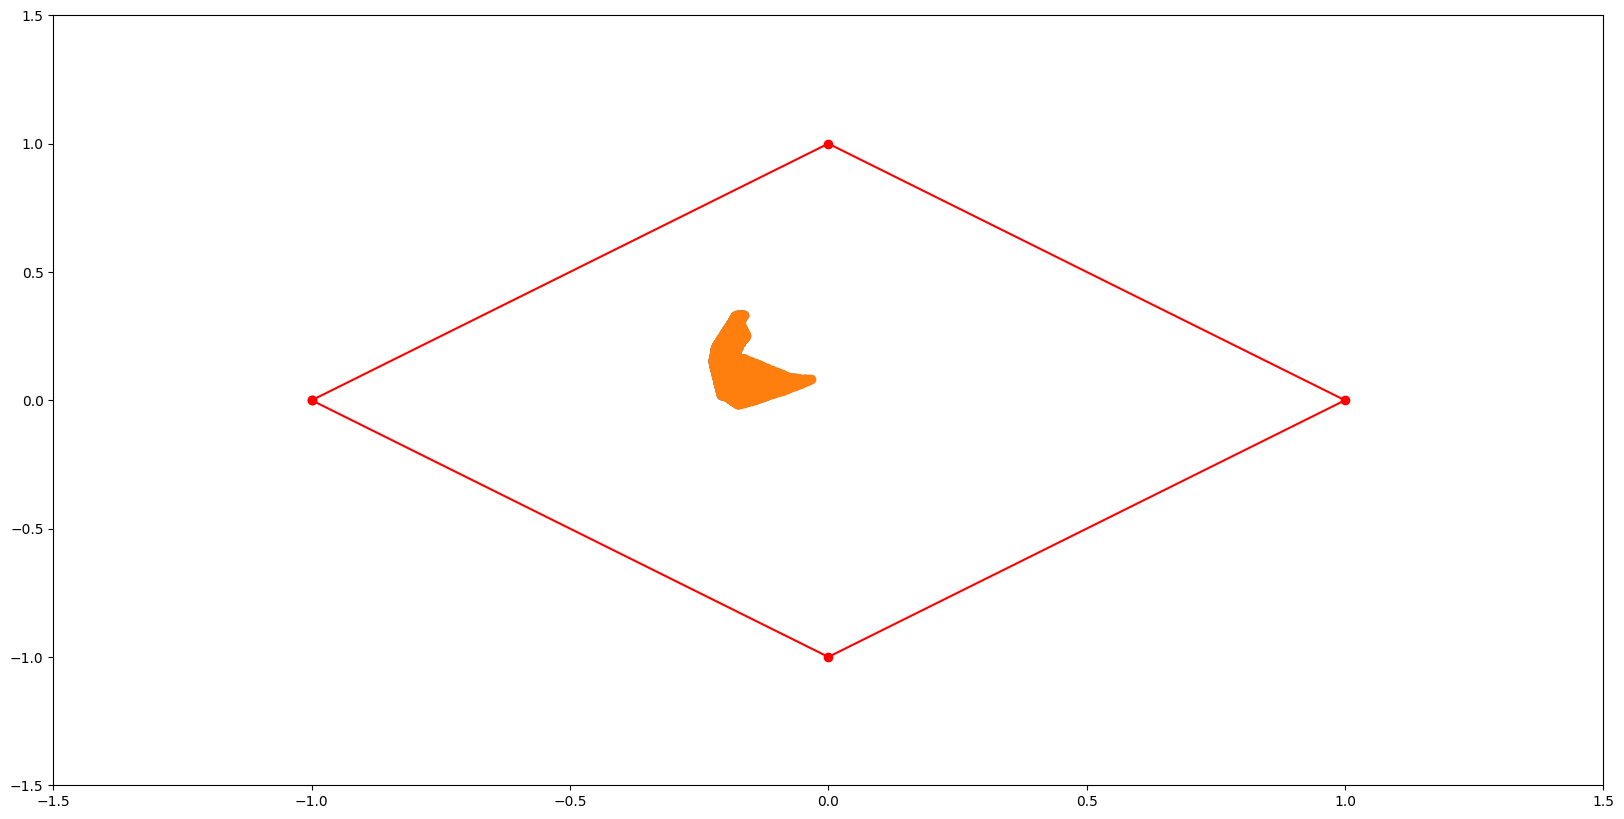

In [5]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


In [6]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, hyper_lambda=hyper_lambda)


=== Epoch: 0===
batch = 0, mean loss = 1.8394649028778076, l_pos = 0.7178913950920105, l_neg = 0.5371629595756531, l_gen = 0.584410548210144
batch = 100, mean loss = 1.8781640517829667, l_pos = 0.7730404557568011, l_neg = 0.49548081153690227, l_gen = 0.6096427841941909
batch = 200, mean loss = 1.7976168103479033, l_pos = 0.7256625273927527, l_neg = 0.3861519193174827, l_gen = 0.6858023666030731
batch = 219, mean loss = 1.7839943491704933, l_pos = 0.7171370422459085, l_neg = 0.3660032294996797, l_gen = 0.700854079908432
=== Epoch: 1===
batch = 0, mean loss = 1.6308338642120361, l_pos = 0.6219162940979004, l_neg = 0.1348152607679367, l_gen = 0.8741022348403931
batch = 100, mean loss = 1.6042909905461982, l_pos = 0.6002435471751902, l_neg = 0.08647122931214843, l_gen = 0.9175762121040042
batch = 200, mean loss = 1.5783105210878363, l_pos = 0.5755814816524734, l_neg = 0.06851092794567198, l_gen = 0.9342181086540222
batch = 219, mean loss = 1.5735323352900814, l_pos = 0.5709484241324473, l_

In [7]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, hyper_lambda=hyper_lambda)


=== Epoch: 0===
batch = 0, mean loss = 1.1658377647399902, l_pos = 0.16583359241485596, l_neg = 0.0021752463653683662, l_gen = 0.9978289604187012
batch = 100, mean loss = 1.158215854427602, l_pos = 0.15821514728635844, l_neg = 0.0006712371136792613, l_gen = 0.9993294684013517
batch = 200, mean loss = 1.1512614369985477, l_pos = 0.15126104348927588, l_neg = 0.0004546934859586801, l_gen = 0.9995456993283324
batch = 219, mean loss = 1.1500741787697082, l_pos = 0.15007381263661057, l_neg = 0.0004344857356643419, l_gen = 0.9995658792317186
=== Epoch: 1===
batch = 0, mean loss = 1.1339099407196045, l_pos = 0.1339098960161209, l_neg = 6.76025083521381e-05, l_gen = 0.9999324083328247
batch = 100, mean loss = 1.1301403210894896, l_pos = 0.13014027904165854, l_neg = 0.00015700707027093867, l_gen = 0.9998430320532015
batch = 200, mean loss = 1.1249817746195627, l_pos = 0.12498174081394328, l_neg = 0.00014463015154727495, l_gen = 0.9998554050625853
batch = 219, mean loss = 1.1241368583348244, l_po

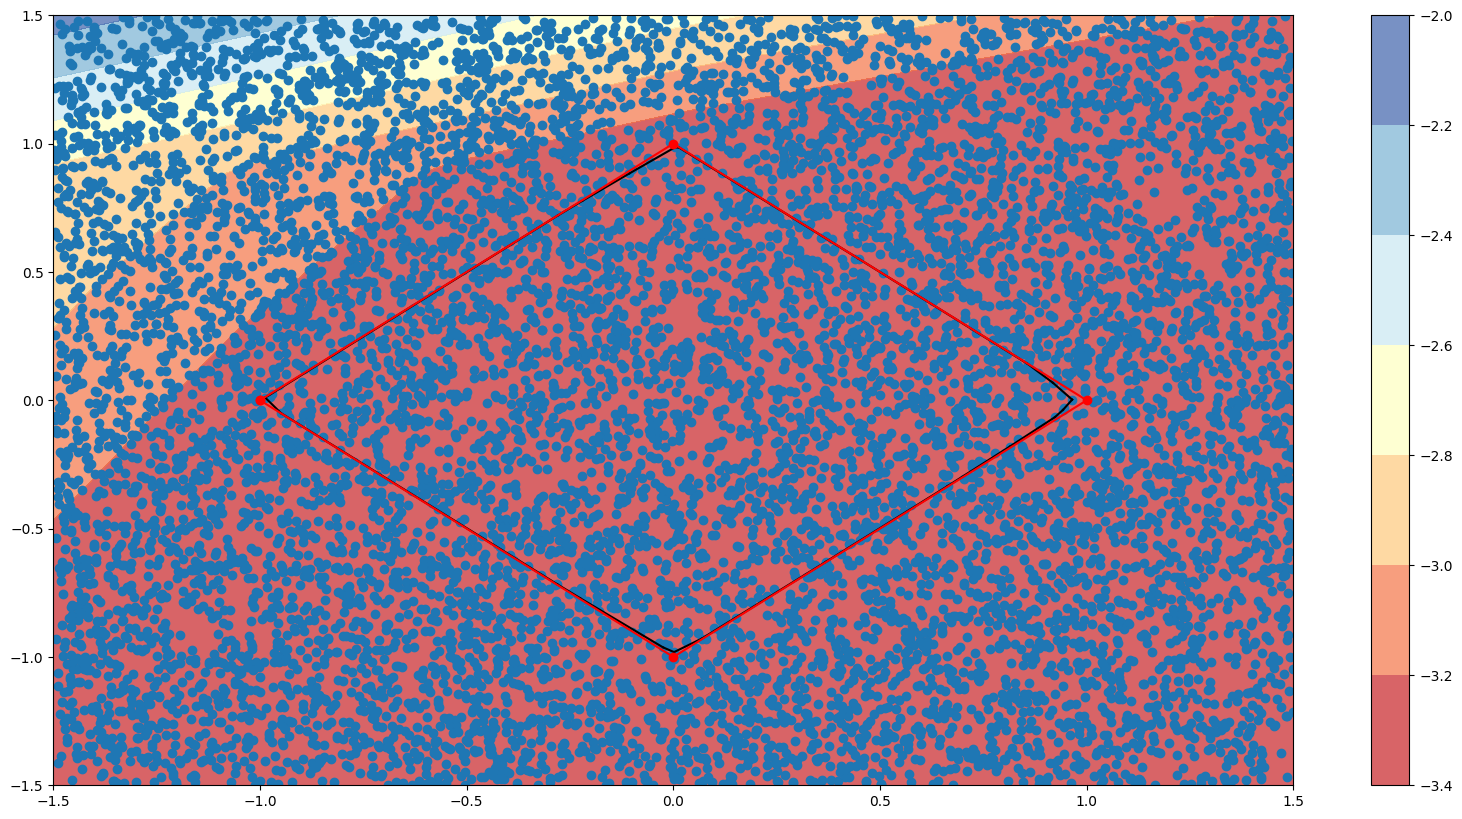

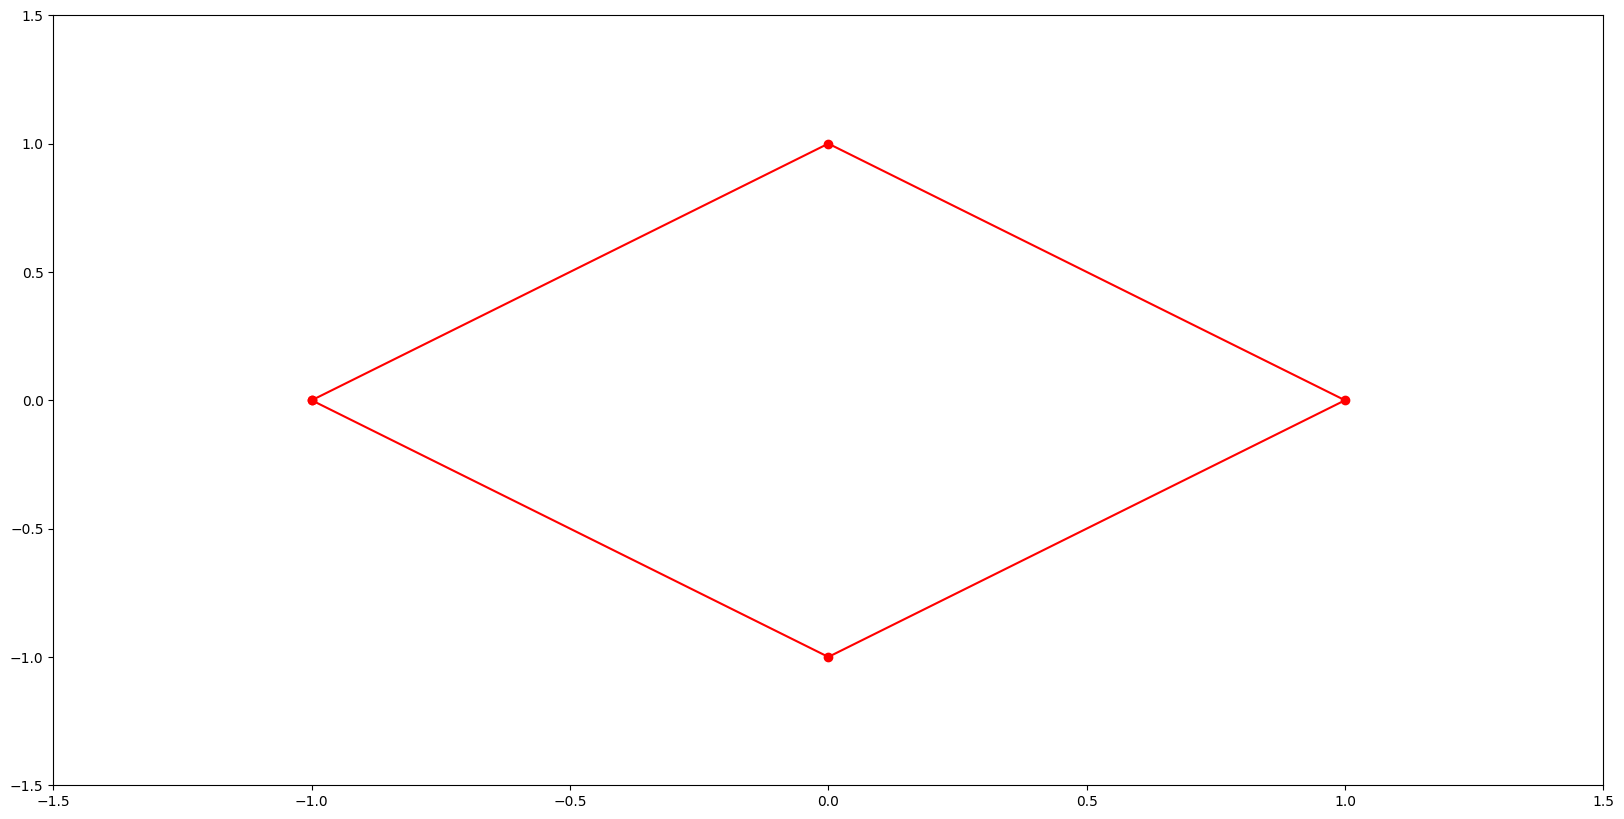

In [8]:
plots.plt_mesh()
plots.plt_adversarial_dotted()

In [17]:
A, b = Rhombus().get_A(), Rhombus().get_b()
result = verification(icnn, A=A, b=b, sequential=False)

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 138 rows, 96 columns and 366 nonzeros
Model fingerprint: 0xfa4e0a96
Variable types: 76 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [5e-05, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+03]
  RHS range        [2e-03, 1e+03]
Found heuristic solution: objective -3.3028834
Presolve removed 71 rows and 46 columns
Presolve time: 0.00s
Presolved: 67 rows, 50 columns, 261 nonzeros
Variable types: 35 continuous, 15 integer (15 binary)

Root relaxation: objective -3.055666e+00, 38 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   -3.05567    0

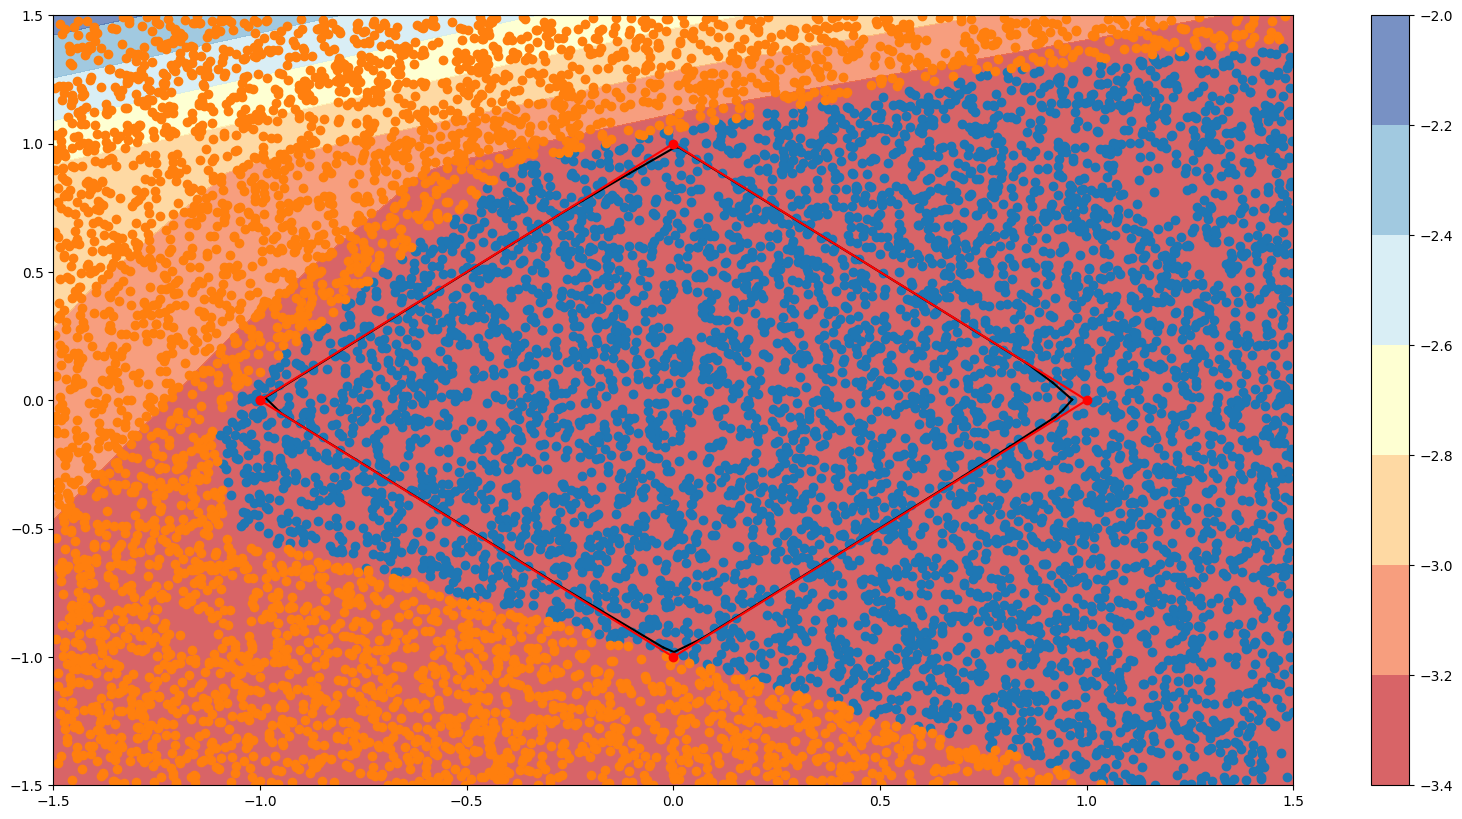

In [19]:
input_data, plots.c = result
plots.plt_mesh()